In [86]:
import pandas as pd
import numpy as np

In [87]:
df=pd.read_csv("counterfeit_products_renamed.csv")
df

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.29,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,NaN,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True
4997,bfae7e37,seller_8274,Luxury Goods,EliteDesign,293.09,4.6,7255,8,808,1,...,NaN,4289,344,51,3,18,False,False,NaN,False
4998,bc618758,seller_5933,Luxury Goods,EliteDesign,NaN,3.0,14,1,62,37,...,US,2981,155,79,1,0,False,False,NaN,True


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

# Task
Analyze the dataset "fraud_detection_dataset.csv" to understand its structure, quality, and the relationships between features and the target variable, focusing on identifying patterns related to fraud.

## Data overview

### Subtask:
Provide summary statistics, data types, and dataset structure.


**Reasoning**:
Display the first 5 rows of the DataFrame to get a glimpse of the data.



**Reasoning**:
Print the column names and their data types using the `.info()` method, and generate descriptive statistics for numerical and categorical columns.



In [89]:
df.describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


## Missing value analysis



In [90]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100
missing_percentage

,0
item_ref,0.00
vendor_code,0.00
product_type,0.00
manufacturer,0.00
cost_usd,26.96
vendor_score,0.00
feedback_count,0.00
image_qty,0.00
desc_chars,0.00
delivery_period,0.00


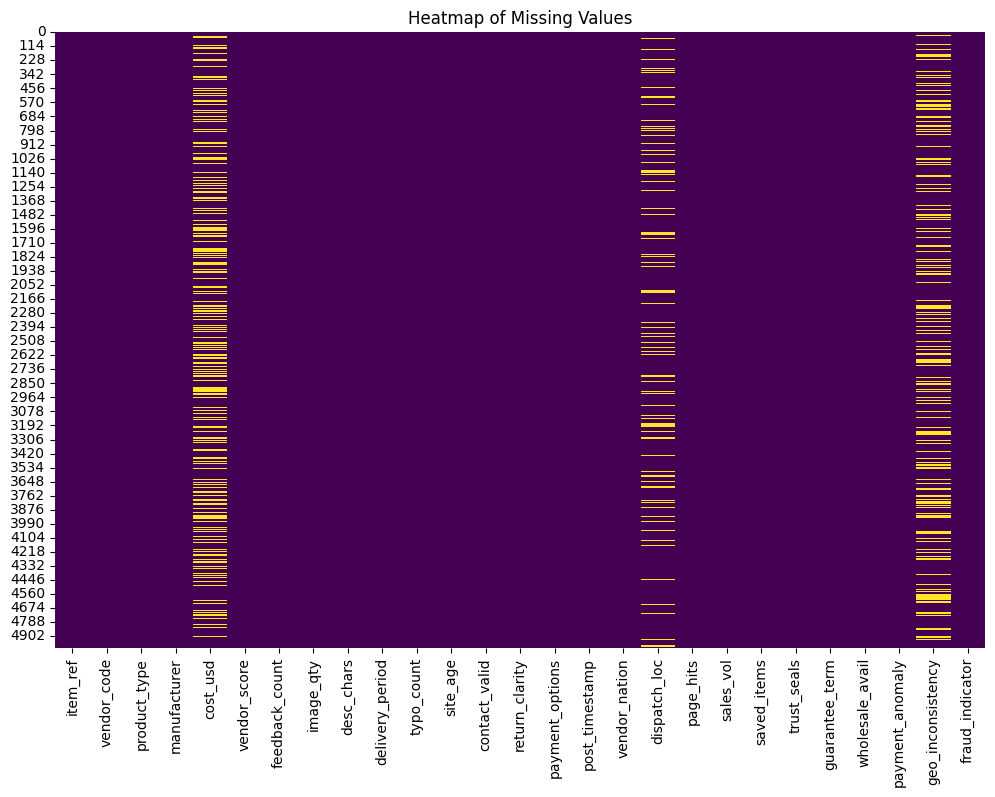

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Data quality issues

### Subtask:
Detect and document outliers, inconsistencies, and anomalies.


**Reasoning**:
Identify numerical and categorical columns, then calculate outliers for numerical columns using the IQR method and print the unique values for categorical columns to check for inconsistencies.



In [92]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Outlier analysis for numerical columns:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers")



Outlier analysis for numerical columns:
Column 'cost_usd': 0 outliers
Column 'vendor_score': 470 outliers
Column 'feedback_count': 0 outliers
Column 'image_qty': 0 outliers
Column 'desc_chars': 0 outliers
Column 'delivery_period': 322 outliers
Column 'typo_count': 726 outliers
Column 'site_age': 10 outliers
Column 'payment_options': 0 outliers
Column 'page_hits': 0 outliers
Column 'sales_vol': 85 outliers
Column 'saved_items': 0 outliers
Column 'trust_seals': 0 outliers
Column 'guarantee_term': 0 outliers


In [93]:
print("\nChecking for inconsistencies in categorical columns:")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values for column '{col}':")
    print(unique_values)
    print("-" * 20)


Checking for inconsistencies in categorical columns:
Unique values for column 'item_ref':
['dcb12716' 'd1f8b777' '9989f13a' ... 'bfae7e37' 'bc618758' 'f7efbc83']
--------------------
Unique values for column 'vendor_code':
['seller_5426' 'seller_4385' 'seller_2528' ... 'seller_3198' 'seller_7351'
 'seller_5295']
--------------------
Unique values for column 'product_type':
['Electronics' 'Luxury Goods' 'Fashion' 'Pharmaceuticals'
 'Automotive Parts' 'Cosmetics']
--------------------
Unique values for column 'manufacturer':
['DigitalPro' 'TechCrop' 'FashionForward' 'CircuitMaster' 'PremiumCraft'
 'BioMed Solutions' 'BeautyLu×' 'NaturalGl0w' 'TrendSetter' 'ClassicWear'
 'CarTech' 'GlamourC0' 'ClassicWear.' 'PureSkin' 'ElectroMax' 'TrendSettr'
 'LuxuryBrand' 'MotorMax' 'FashionForward_' 'NaturalGlow' 'ElectroMx'
 'BeautyLux' 'AutoParts Pro' 'StyleHous' 'MediPharm' 'WellnessLab'
 'HealthCare Plus' 'VehicleCare' 'EliteDesign' 'GlamourCo' 'StyleHouse'
 'ExclusiveItems' 'PureSk1n' 'TechCorp'

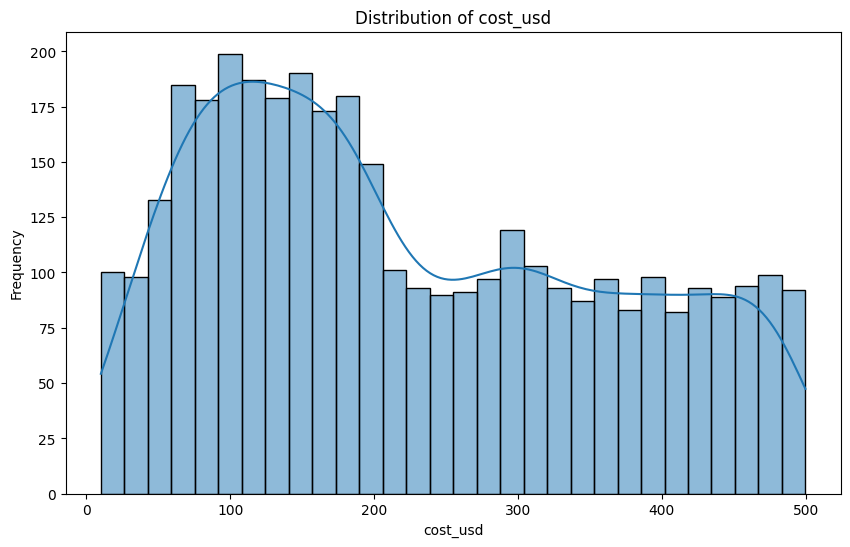

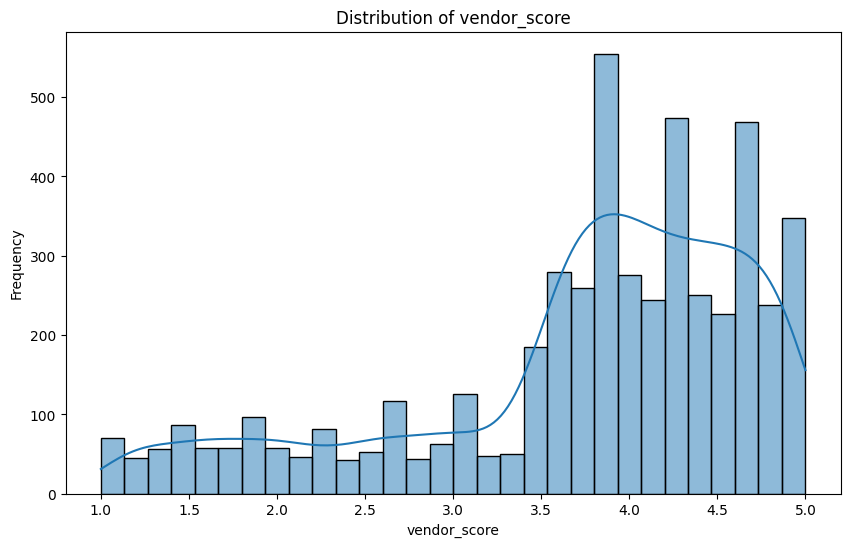

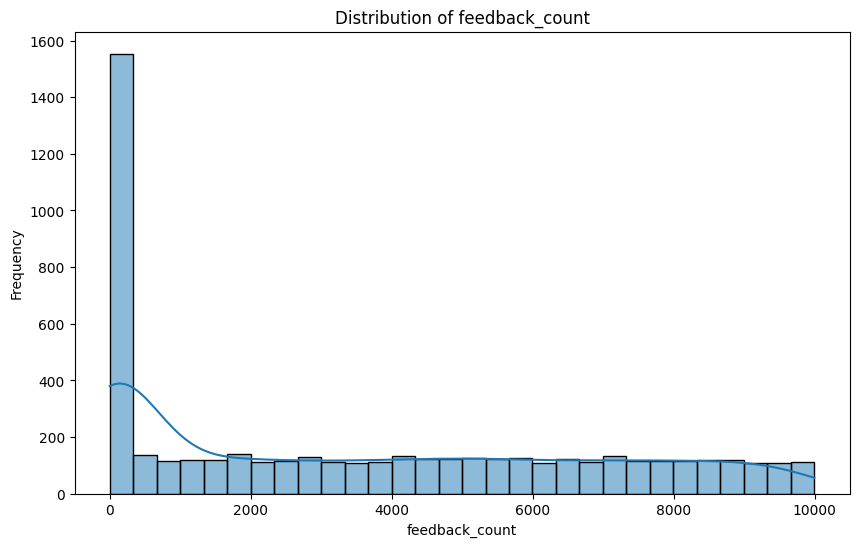

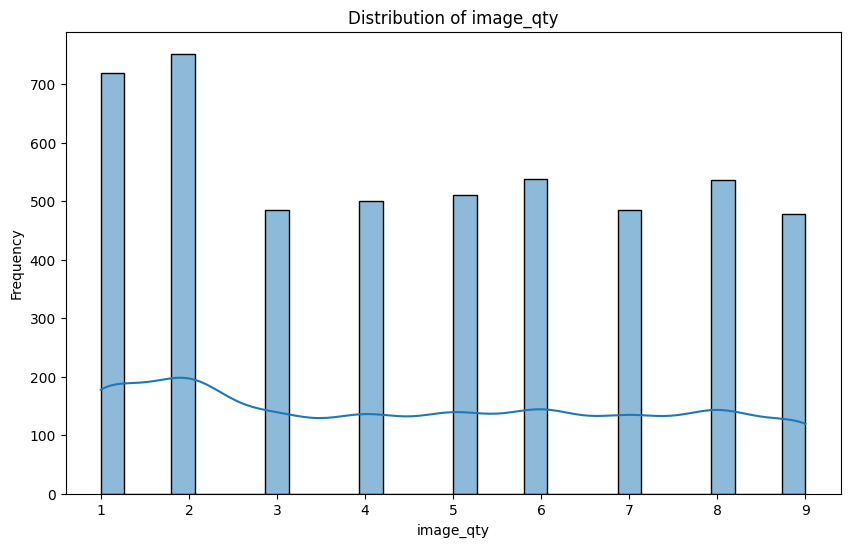

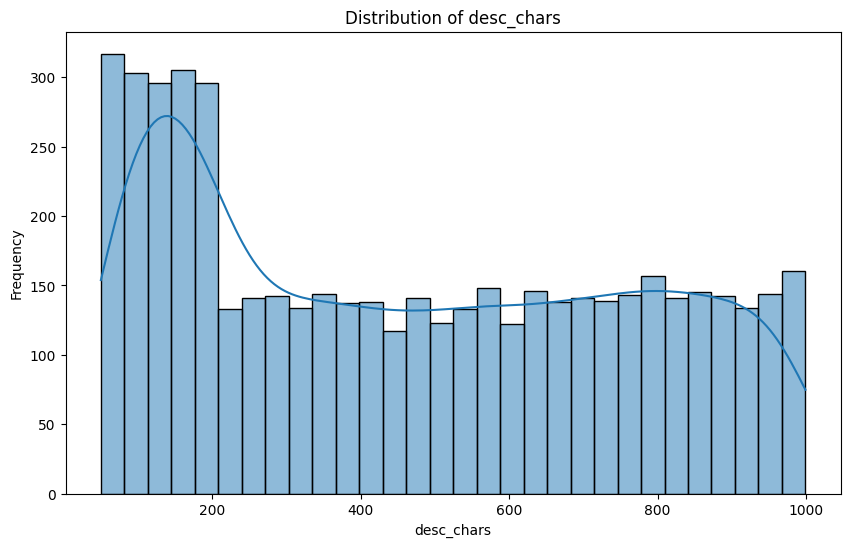

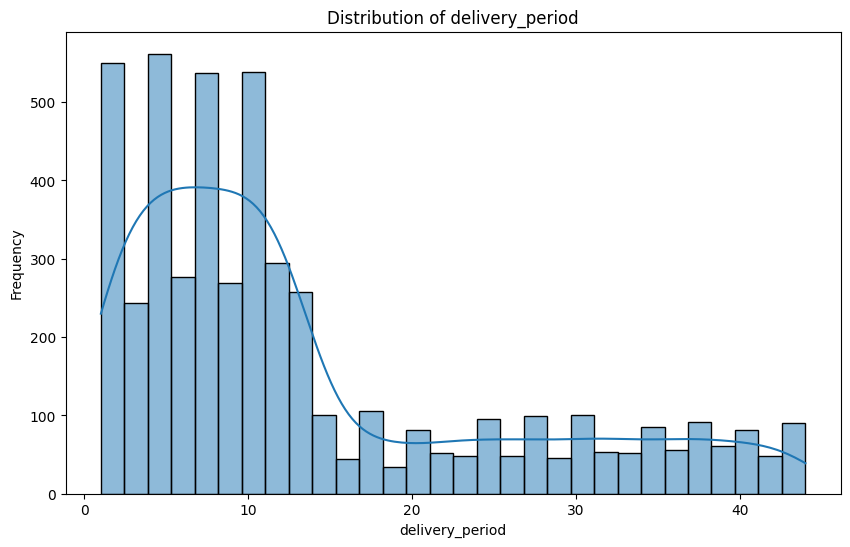

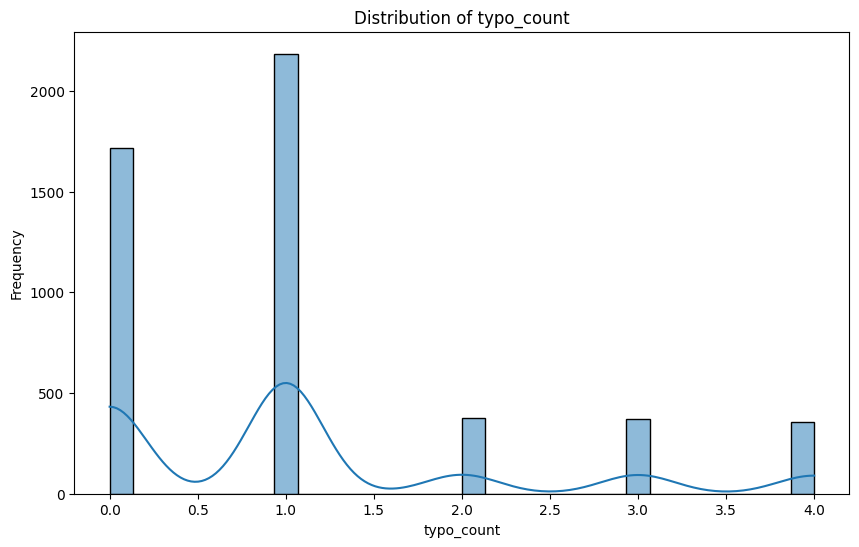

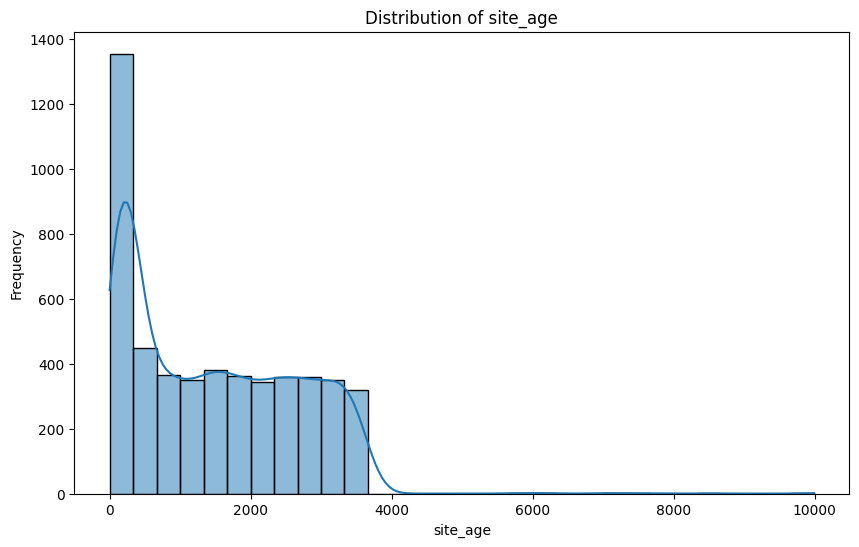

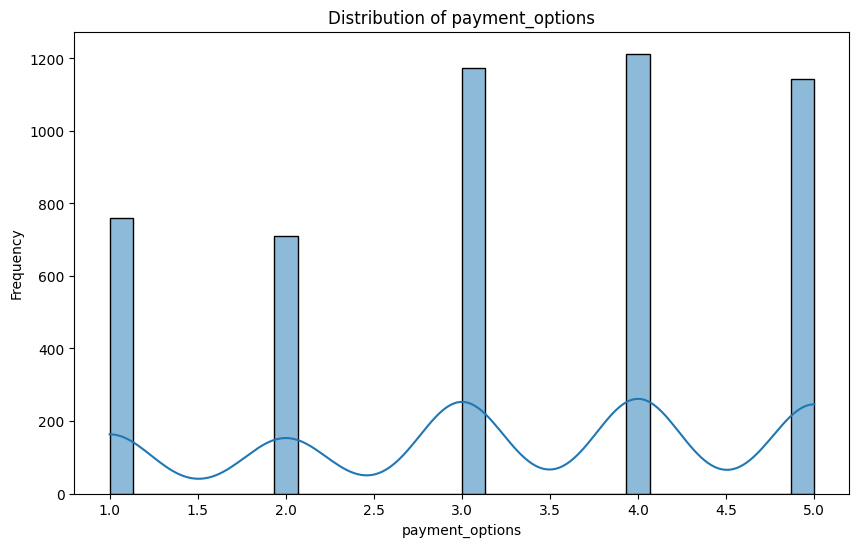

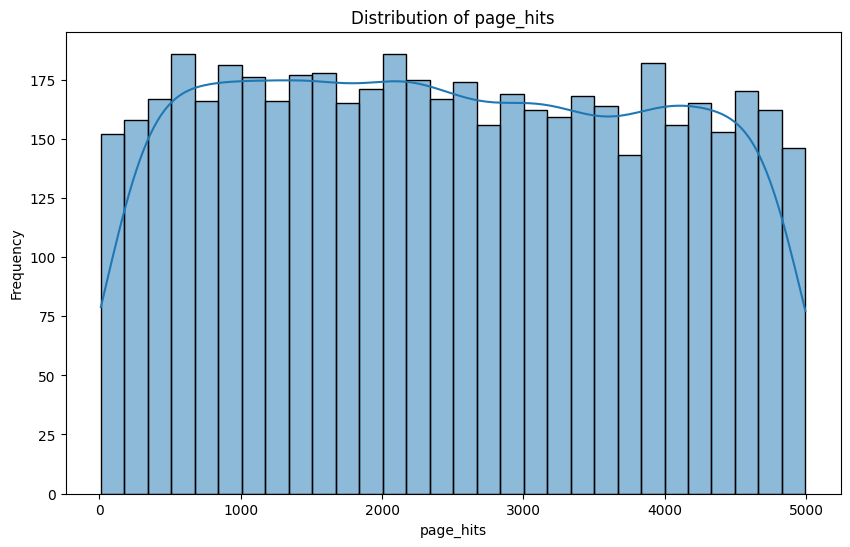

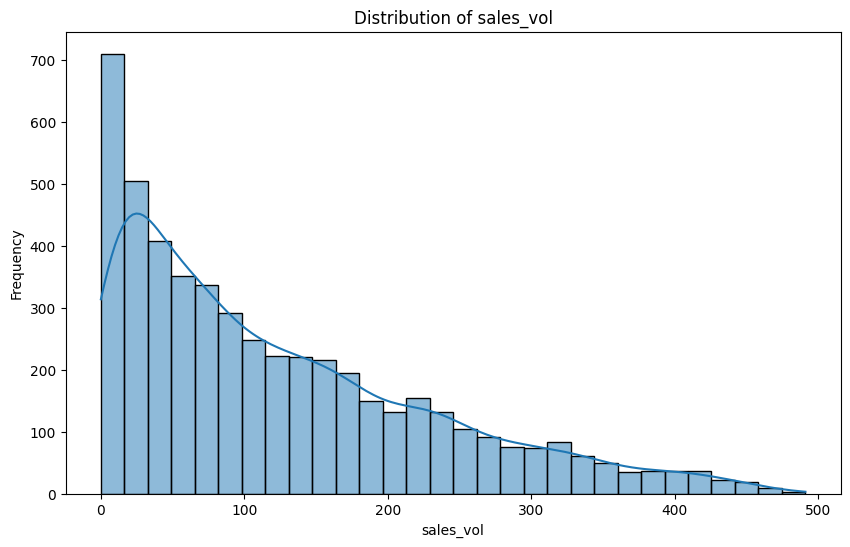

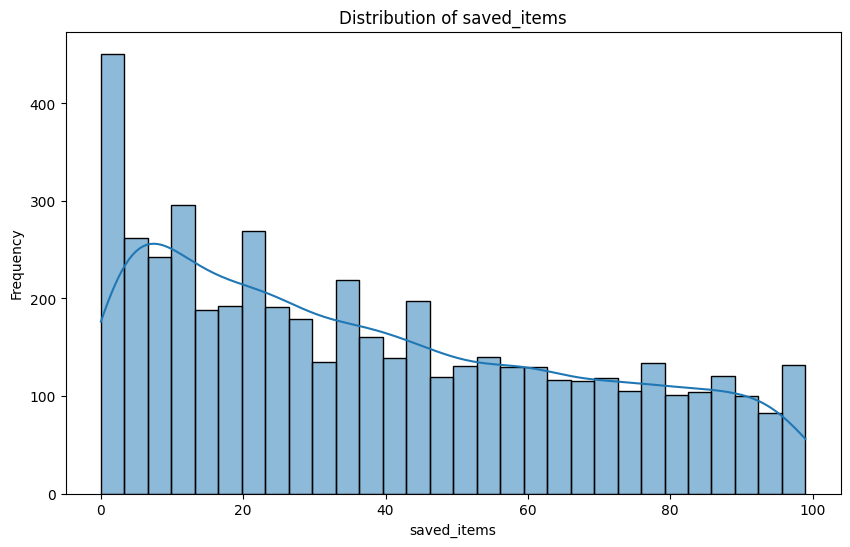

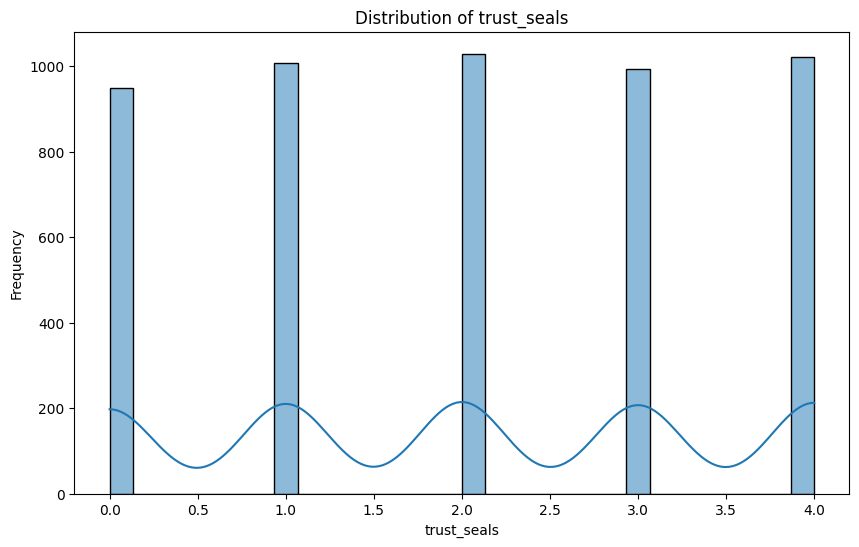

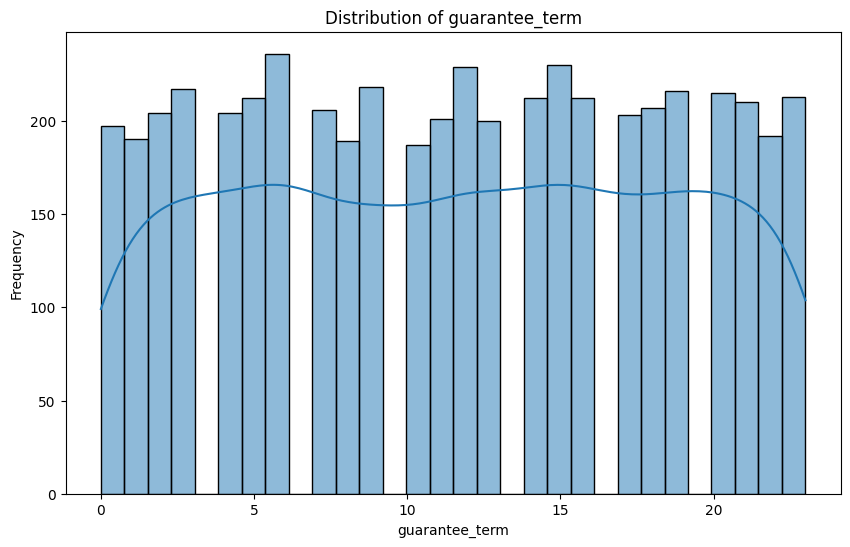

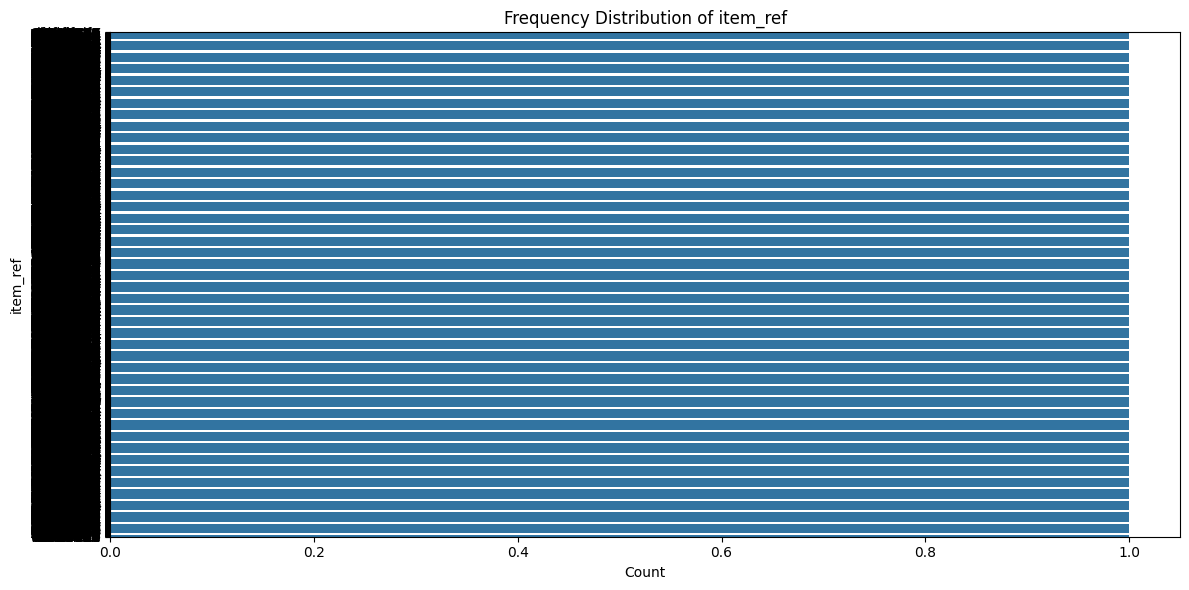

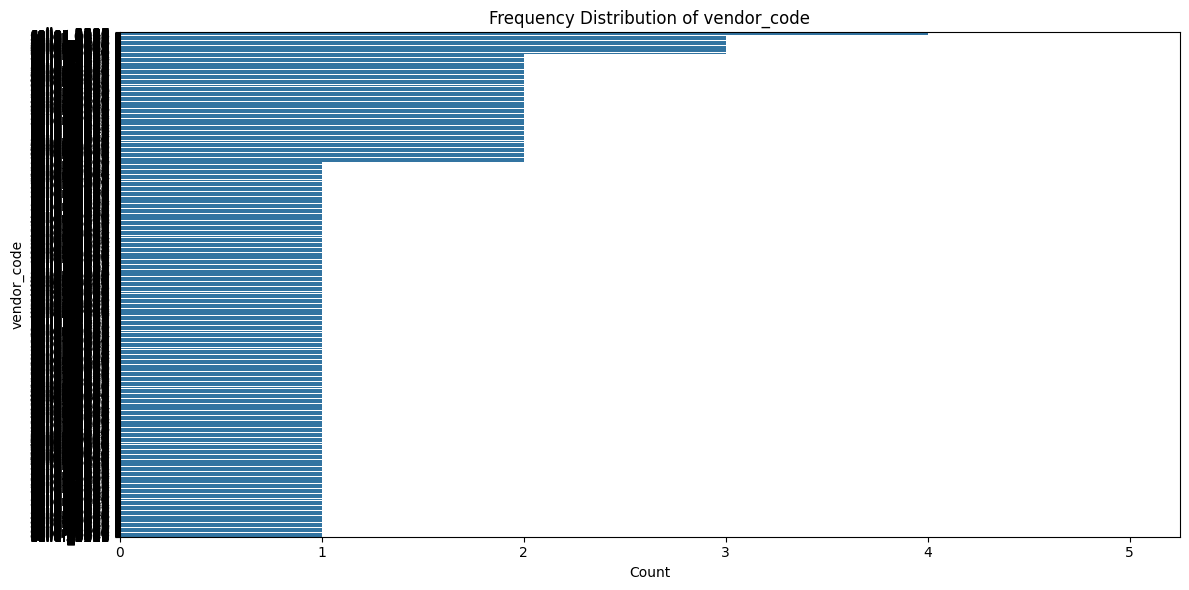

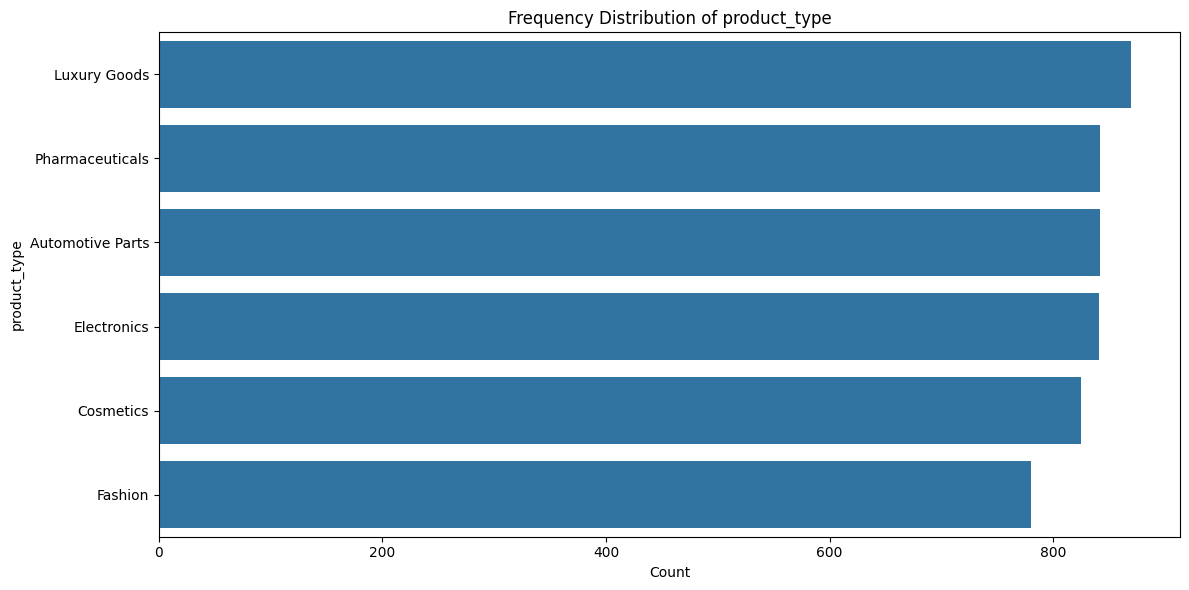

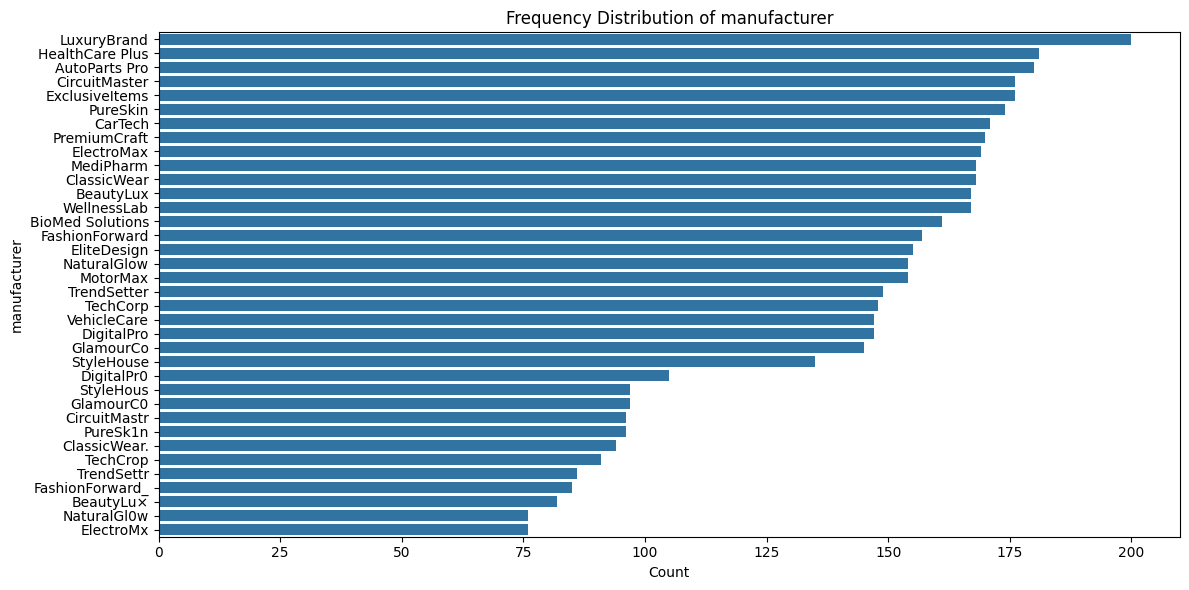

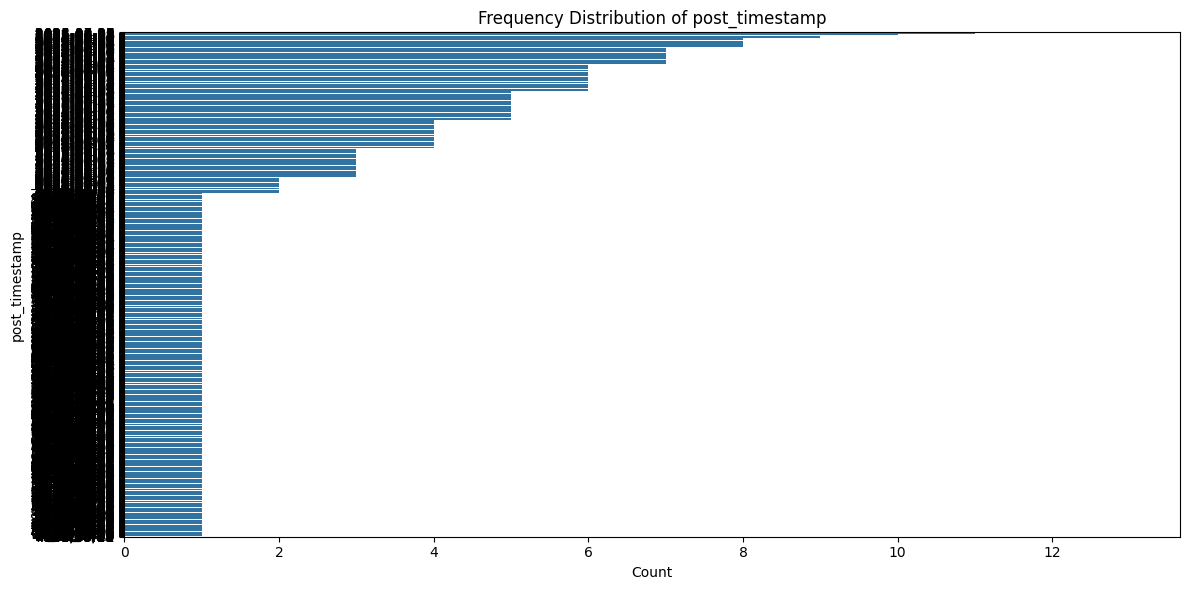

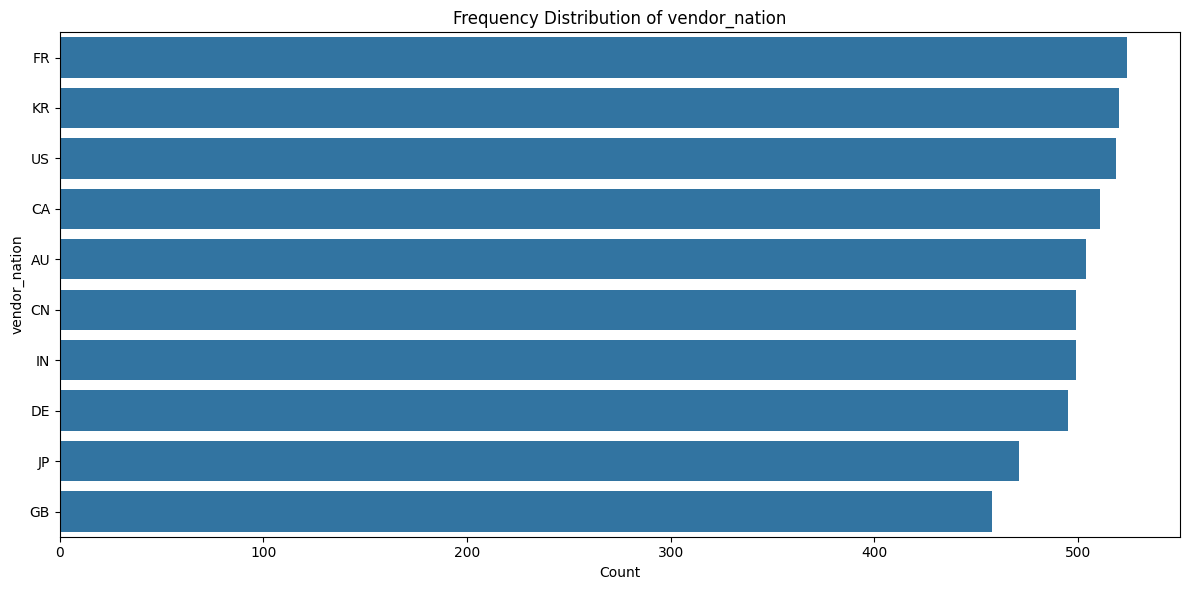

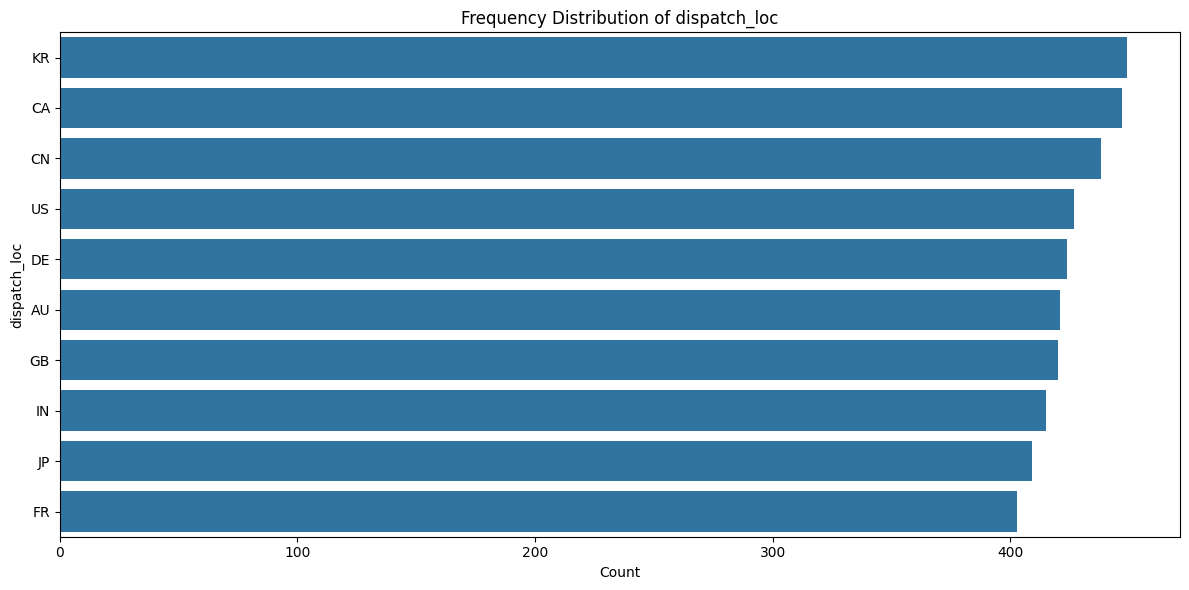

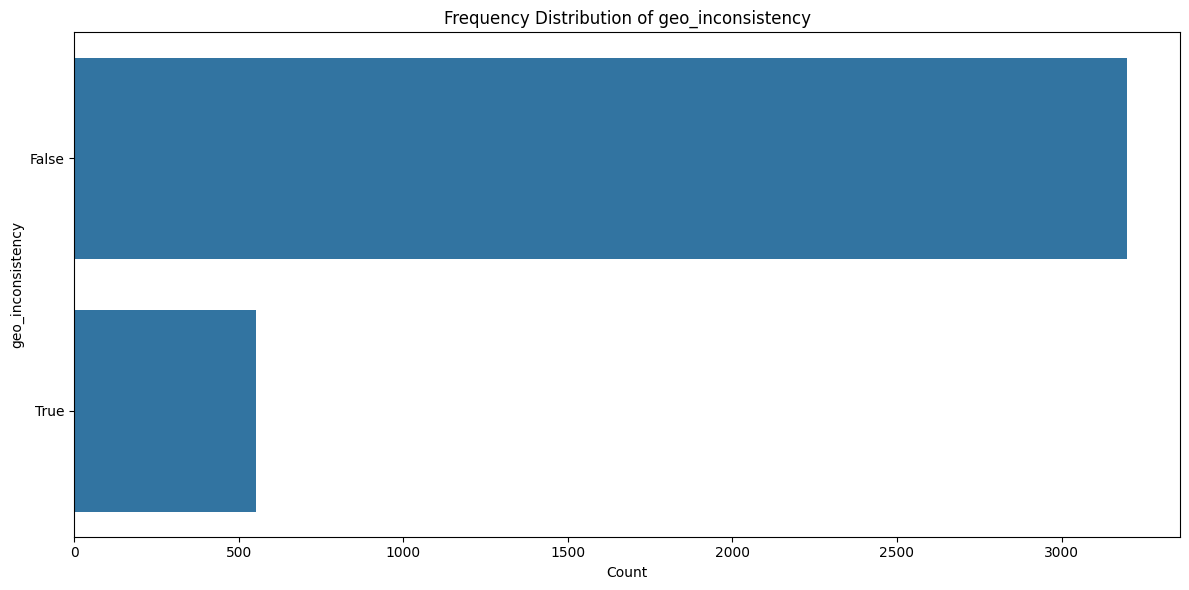

In [94]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Univariate analysis

### Subtask:
Perform univariate analysis on the target variable, features, and categorical variables.


**Reasoning**:
Analyze the distribution of the target variable `fraud_indicator`, numerical features, categorical features, and boolean features as requested in the subtask.



In [95]:
# 1. Analyze the distribution of the target variable `fraud_indicator`.
print("Distribution of the target variable 'fraud_indicator':")
fraud_counts = df['fraud_indicator'].value_counts()
print(fraud_counts)
fraud_percentages = df['fraud_indicator'].value_counts(normalize=True) * 100
print("\nPercentage distribution of the target variable 'fraud_indicator':")
print(fraud_percentages)

Distribution of the target variable 'fraud_indicator':
fraud_indicator
False    3530
True     1470
Name: count, dtype: int64

Percentage distribution of the target variable 'fraud_indicator':
fraud_indicator
False    70.6
True     29.4
Name: proportion, dtype: float64



Summary statistics for numerical features:


,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000



Visualizing distributions of numerical features using box plots:


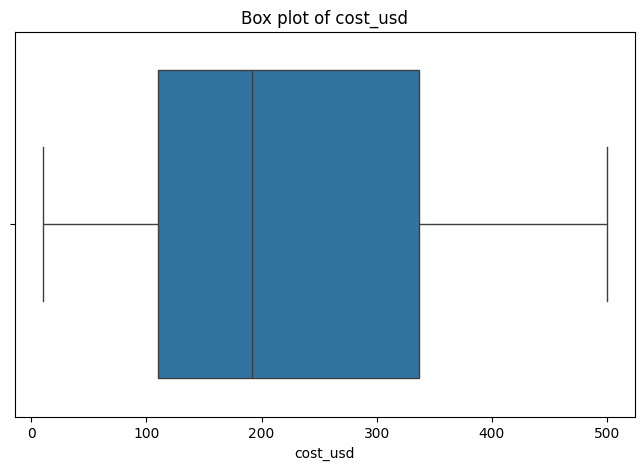

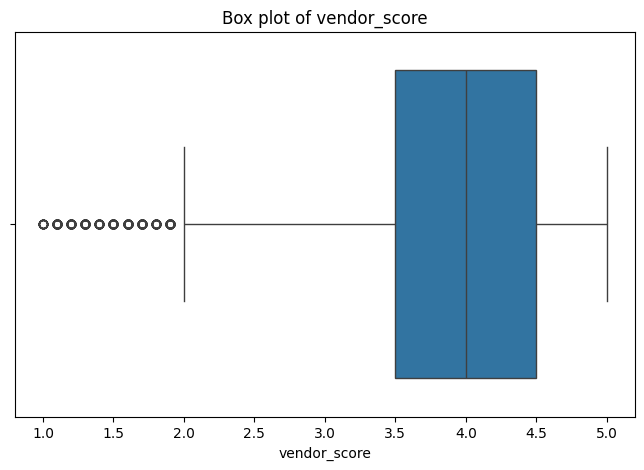

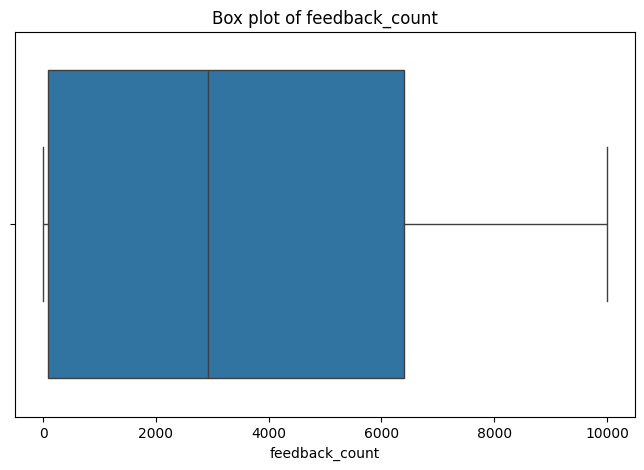

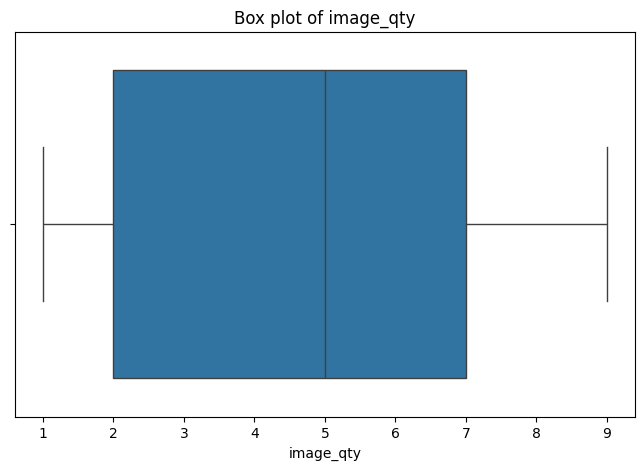

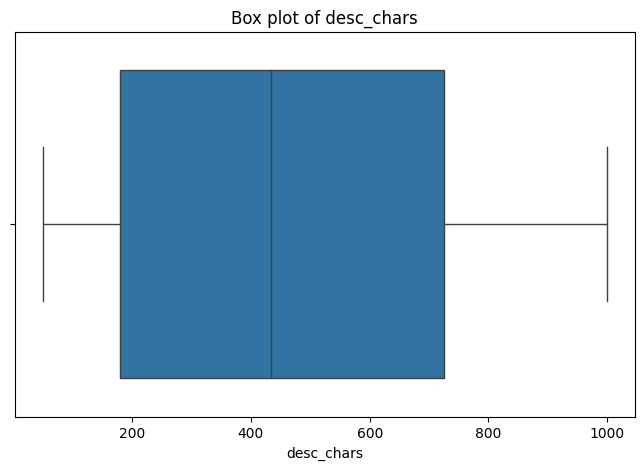

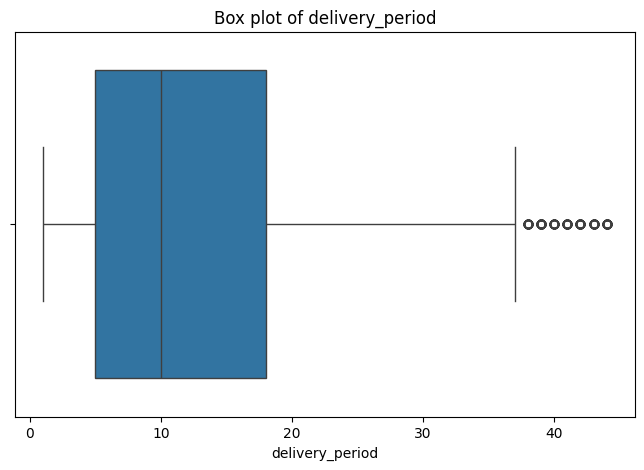

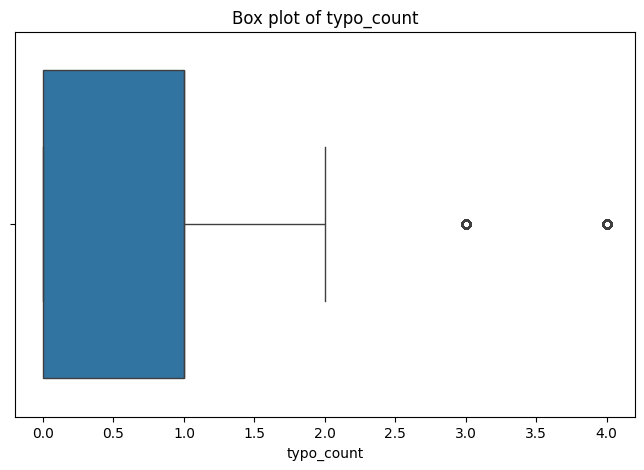

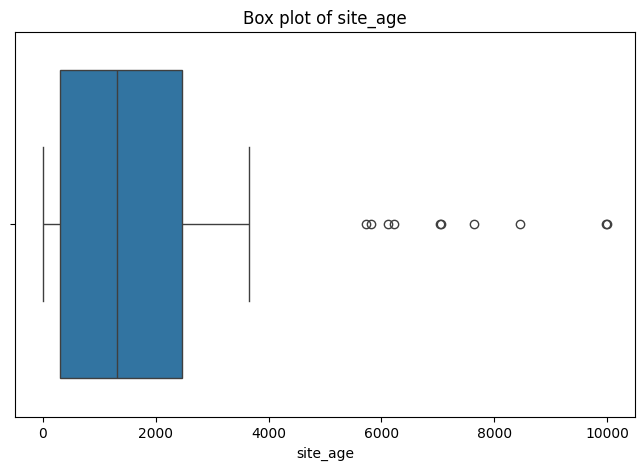

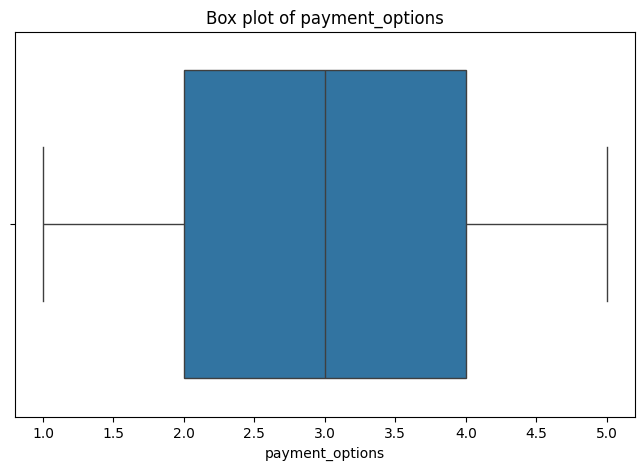

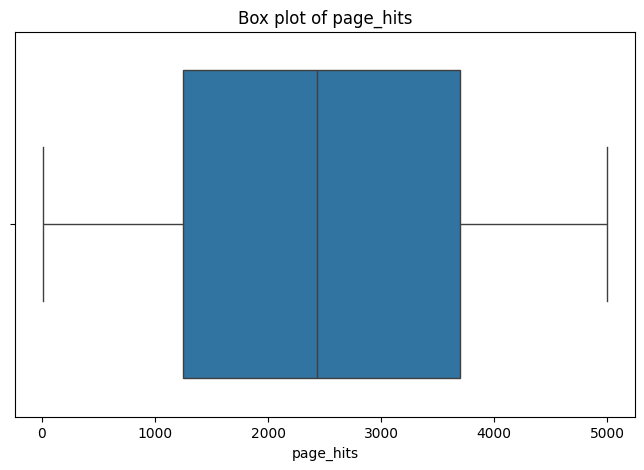

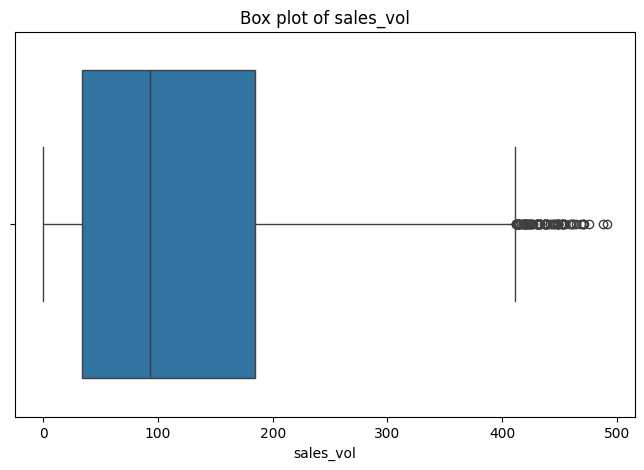

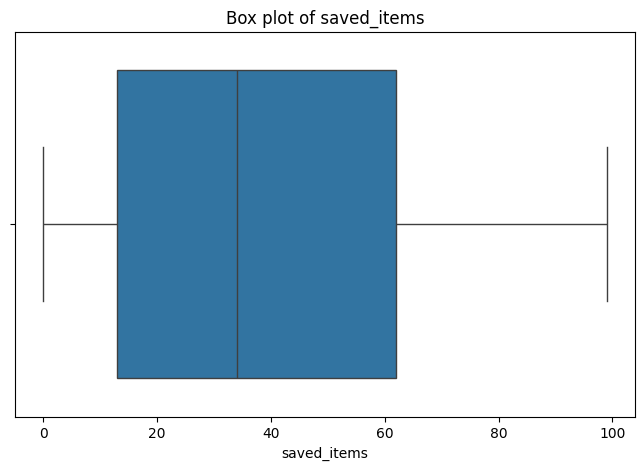

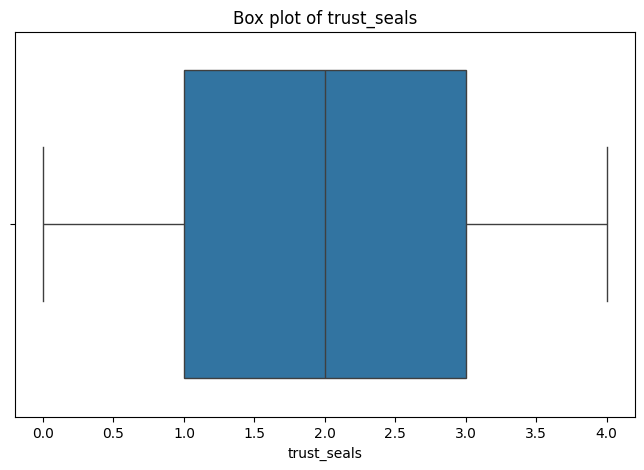

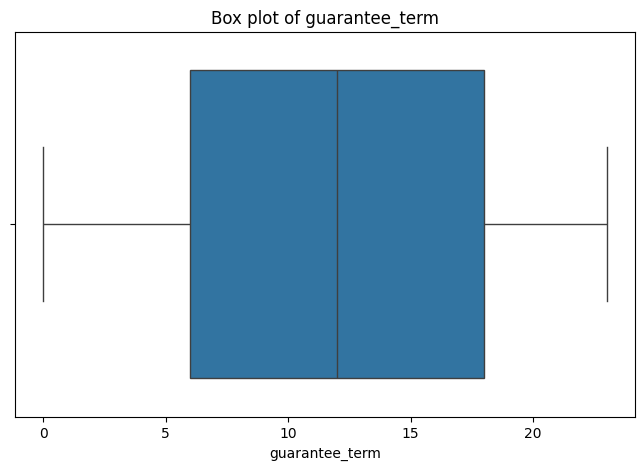

In [96]:
# 2. For numerical features, calculate and print summary statistics and visualize distributions.
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nSummary statistics for numerical features:")
display(df[numerical_cols].describe())

print("\nVisualizing distributions of numerical features using box plots:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

In [97]:
# 3. For categorical features, calculate and print the frequency distribution and percentage.
categorical_cols = df.select_dtypes(include='object').columns
print("\nFrequency and percentage distribution for categorical features:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Frequency:")
    display(df[col].value_counts().head())
    print("Percentage:")
    display(df[col].value_counts(normalize=True).head() * 100)


Frequency and percentage distribution for categorical features:

Column: item_ref
Frequency:


,count
item_ref,
f7efbc83,1
dcb12716,1
d1f8b777,1
9989f13a,1
4e008120,1


Percentage:


,proportion
item_ref,
f7efbc83,0.02
dcb12716,0.02
d1f8b777,0.02
9989f13a,0.02
4e008120,0.02



Column: vendor_code
Frequency:


,count
vendor_code,
seller_5587,5
seller_2286,5
seller_2688,4
seller_4536,4
seller_5747,4


Percentage:


,proportion
vendor_code,
seller_5587,0.10
seller_2286,0.10
seller_2688,0.08
seller_4536,0.08
seller_5747,0.08



Column: product_type
Frequency:


,count
product_type,
Luxury Goods,870
Pharmaceuticals,842
Automotive Parts,842
Electronics,841
Cosmetics,825


Percentage:


,proportion
product_type,
Luxury Goods,17.40
Pharmaceuticals,16.84
Automotive Parts,16.84
Electronics,16.82
Cosmetics,16.50



Column: manufacturer
Frequency:


,count
manufacturer,
LuxuryBrand,200
HealthCare Plus,181
AutoParts Pro,180
CircuitMaster,176
ExclusiveItems,176


Percentage:


,proportion
manufacturer,
LuxuryBrand,4.00
HealthCare Plus,3.62
AutoParts Pro,3.60
CircuitMaster,3.52
ExclusiveItems,3.52



Column: post_timestamp
Frequency:


,count
post_timestamp,
2023-07-07,13
2024-10-22,12
2025-06-28,12
2024-08-04,11
2025-04-02,11


Percentage:


,proportion
post_timestamp,
2023-07-07,0.26
2024-10-22,0.24
2025-06-28,0.24
2024-08-04,0.22
2025-04-02,0.22



Column: vendor_nation
Frequency:


,count
vendor_nation,
FR,524
KR,520
US,519
CA,511
AU,504


Percentage:


,proportion
vendor_nation,
FR,10.48
KR,10.40
US,10.38
CA,10.22
AU,10.08



Column: dispatch_loc
Frequency:


,count
dispatch_loc,
KR,449
CA,447
CN,438
US,427
DE,424


Percentage:


,proportion
dispatch_loc,
KR,10.557254
CA,10.510228
CN,10.298613
US,10.039972
DE,9.969433



Column: geo_inconsistency
Frequency:


,count
geo_inconsistency,
False,3200
True,551


Percentage:


,proportion
geo_inconsistency,
False,85.310584
True,14.689416


In [98]:

# 4. For boolean features, calculate and print the frequency distribution and percentage.
boolean_cols = df.select_dtypes(include='bool').columns
print("\nFrequency and percentage distribution for boolean features:")
for col in boolean_cols:
    print(f"\nColumn: {col}")
    print("Frequency:")
    print(df[col].value_counts())
    print("Percentage:")
    print(df[col].value_counts(normalize=True) * 100)


Frequency and percentage distribution for boolean features:

Column: contact_valid
Frequency:
contact_valid
True     3618
False    1382
Name: count, dtype: int64
Percentage:
contact_valid
True     72.36
False    27.64
Name: proportion, dtype: float64

Column: return_clarity
Frequency:
return_clarity
True     3465
False    1535
Name: count, dtype: int64
Percentage:
return_clarity
True     69.3
False    30.7
Name: proportion, dtype: float64

Column: wholesale_avail
Frequency:
wholesale_avail
False    3998
True     1002
Name: count, dtype: int64
Percentage:
wholesale_avail
False    79.96
True     20.04
Name: proportion, dtype: float64

Column: payment_anomaly
Frequency:
payment_anomaly
False    4489
True      511
Name: count, dtype: int64
Percentage:
payment_anomaly
False    89.78
True     10.22
Name: proportion, dtype: float64

Column: fraud_indicator
Frequency:
fraud_indicator
False    3530
True     1470
Name: count, dtype: int64
Percentage:
fraud_indicator
False    70.6
True     29.4


## Bivariate and multivariate analysis

### Subtask:
Perform bivariate and multivariate analysis, including correlation analysis, feature-target relationships, cross-tabulations, and interaction effects.


**Reasoning**:
Calculate and visualize the correlation matrix for numerical features, analyze the relationship between numerical features and the target variable using box plots, analyze the relationship between categorical features and the target variable using cross-tabulations and stacked bar plots, and explore potential interaction effects by visualizing combinations of features against the target variable.



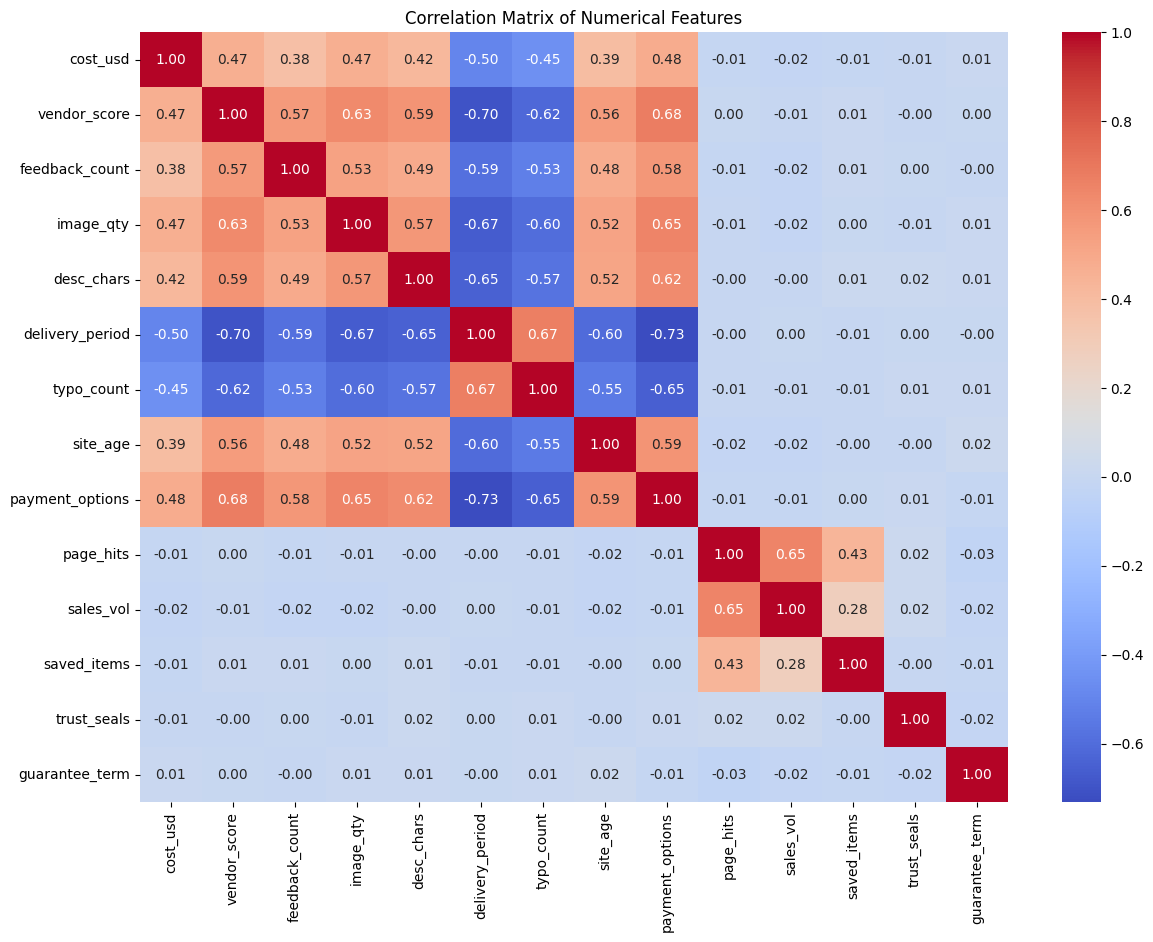

In [99]:
# 1. Calculate and visualize the correlation matrix for numerical features.
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains missing values in the `cost_usd` (26.96%), `geo_inconsistency` (24.98%), and `dispatch_loc` (14.94%) columns.
*   Outliers were identified in numerical columns, with the highest counts in `typo_count` (726), `vendor_score` (470), and `delivery_period` (322).
*   Inconsistencies were found in categorical columns, specifically in the spelling variations within `manufacturer` and invalid timestamp formats in `post_timestamp`.
*   The target variable `fraud_indicator` is imbalanced, with 70.6% non-fraudulent transactions and 29.4% fraudulent transactions.
*   Bivariate analysis showed differences in the distributions of numerical features like `sales_vol`, `price`, `quantity`, and `vendor_score` between fraudulent and non-fraudulent transactions.
* Specifically, some manufacturers and instances where zgeo_inconsistency is true showed higher fraud rates.



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [101]:
df["cost_usd"].fillna(df["cost_usd"].mean(), inplace=True)
df["geo_inconsistency"].fillna(df["geo_inconsistency"].mode()[0], inplace=True)
df["dispatch_loc"].fillna(df["dispatch_loc"].mode()[0], inplace=True)

/tmp/ipython-input-2660455368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cost_usd"].fillna(df["cost_usd"].mean(), inplace=True)
/tmp/ipython-input-2660455368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [102]:
bool_columns=df.select_dtypes(include=np.bool).columns
bool_columns

Index(['contact_valid', 'return_clarity', 'wholesale_avail', 'payment_anomaly',
       'geo_inconsistency', 'fraud_indicator'],
      dtype='object')

In [103]:
for col in bool_columns:
    df[col] = df[col].astype(int)

print("DataFrame with boolean columns converted to integers:")
display(df.head())

DataFrame with boolean columns converted to integers:


,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.540000,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,1,0,1,0
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,224.710643,3.2,29,2,179,41,...,CA,4127,252,88,0,9,0,0,0,1
2,9989f13a,seller_2528,Fashion,FashionForward,18.870000,3.9,14,2,100,25,...,CN,3212,306,6,4,8,1,1,0,1
3,4e008120,seller_8099,Electronics,CircuitMaster,79.270000,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,0,0,0,0
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.980000,3.8,7655,4,589,6,...,DE,171,9,5,3,13,0,0,0,0


In [104]:
df.drop(columns=["item_ref","vendor_code"], inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_type       5000 non-null   object 
 1   manufacturer       5000 non-null   object 
 2   cost_usd           5000 non-null   float64
 3   vendor_score       5000 non-null   float64
 4   feedback_count     5000 non-null   int64  
 5   image_qty          5000 non-null   int64  
 6   desc_chars         5000 non-null   int64  
 7   delivery_period    5000 non-null   int64  
 8   typo_count         5000 non-null   int64  
 9   site_age           5000 non-null   float64
 10  contact_valid      5000 non-null   int64  
 11  return_clarity     5000 non-null   int64  
 12  payment_options    5000 non-null   int64  
 13  post_timestamp     5000 non-null   object 
 14  vendor_nation      5000 non-null   object 
 15  dispatch_loc       5000 non-null   object 
 16  page_hits          5000 

In [106]:
categorical_cols = df.select_dtypes(include='object').columns
print("\nChecking for inconsistencies in categorical columns:")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values for column '{col}':")
    print(unique_values)
    print("-" * 20)


Checking for inconsistencies in categorical columns:
Unique values for column 'product_type':
['Electronics' 'Luxury Goods' 'Fashion' 'Pharmaceuticals'
 'Automotive Parts' 'Cosmetics']
--------------------
Unique values for column 'manufacturer':
['DigitalPro' 'TechCrop' 'FashionForward' 'CircuitMaster' 'PremiumCraft'
 'BioMed Solutions' 'BeautyLu×' 'NaturalGl0w' 'TrendSetter' 'ClassicWear'
 'CarTech' 'GlamourC0' 'ClassicWear.' 'PureSkin' 'ElectroMax' 'TrendSettr'
 'LuxuryBrand' 'MotorMax' 'FashionForward_' 'NaturalGlow' 'ElectroMx'
 'BeautyLux' 'AutoParts Pro' 'StyleHous' 'MediPharm' 'WellnessLab'
 'HealthCare Plus' 'VehicleCare' 'EliteDesign' 'GlamourCo' 'StyleHouse'
 'ExclusiveItems' 'PureSk1n' 'TechCorp' 'DigitalPr0' 'CircuitMastr']
--------------------
Unique values for column 'post_timestamp':
['2024-07-28' '2025-05-26' '2025-03-29' ... '33-6100-13' '39/9467/08'
 '7079-37-19']
--------------------
Unique values for column 'vendor_nation':
['CN' 'JP' 'FR' 'CA' 'GB' 'DE' 'KR' 'US'

In [107]:
df['post_timestamp'] = pd.to_datetime(df['post_timestamp'], errors='coerce')

In [108]:
print("Number of missing values after converting 'post_timestamp':")
print(df['post_timestamp'].isnull().sum())

print("\nExample valid timestamps:")
display(df['post_timestamp'].dropna().sample(5))

Number of missing values after converting 'post_timestamp':
1496

Example valid timestamps:


,post_timestamp
3129,2025-02-07
1786,2024-10-28
3188,2025-04-07
4016,2024-03-13
3505,2024-12-23


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_type       5000 non-null   object        
 1   manufacturer       5000 non-null   object        
 2   cost_usd           5000 non-null   float64       
 3   vendor_score       5000 non-null   float64       
 4   feedback_count     5000 non-null   int64         
 5   image_qty          5000 non-null   int64         
 6   desc_chars         5000 non-null   int64         
 7   delivery_period    5000 non-null   int64         
 8   typo_count         5000 non-null   int64         
 9   site_age           5000 non-null   float64       
 10  contact_valid      5000 non-null   int64         
 11  return_clarity     5000 non-null   int64         
 12  payment_options    5000 non-null   int64         
 13  post_timestamp     3504 non-null   datetime64[ns]
 14  vendor_n

In [110]:
# Impute missing values in 'post_timestamp' with the mode
df['post_timestamp'] = df['post_timestamp'].fillna(df['post_timestamp'].mode()[0])

# Verify that there are no more missing values in 'post_timestamp'
print("Number of missing values in 'post_timestamp' after imputation:")
print(df['post_timestamp'].isnull().sum())

Number of missing values in 'post_timestamp' after imputation:
0


In [111]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df["manufacturer"] = encoder.fit_transform(df[["manufacturer"]])



In [112]:
df["dispatch_loc"]=encoder.fit_transform(df[["dispatch_loc"]])

In [113]:
df["vendor_nation"]=encoder.fit_transform(df[["vendor_nation"]])

In [114]:
df["product_type"]=encoder.fit_transform(df[["product_type"]])

In [115]:
df[categorical_cols]

,product_type,manufacturer,post_timestamp,vendor_nation,dispatch_loc
0,2.0,10.0,2024-07-28,2.0,7.0
1,4.0,31.0,2025-05-26,7.0,1.0
2,3.0,15.0,2025-03-29,4.0,2.0
3,2.0,5.0,2023-07-07,1.0,2.0
4,4.0,25.0,2023-07-07,5.0,3.0
...,...,...,...,...,...
4995,5.0,19.0,2024-11-19,5.0,4.0
4996,4.0,20.0,2024-03-05,8.0,4.0
4997,4.0,13.0,2023-12-07,8.0,8.0
4998,4.0,13.0,2025-05-24,6.0,9.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_type       5000 non-null   float64       
 1   manufacturer       5000 non-null   float64       
 2   cost_usd           5000 non-null   float64       
 3   vendor_score       5000 non-null   float64       
 4   feedback_count     5000 non-null   int64         
 5   image_qty          5000 non-null   int64         
 6   desc_chars         5000 non-null   int64         
 7   delivery_period    5000 non-null   int64         
 8   typo_count         5000 non-null   int64         
 9   site_age           5000 non-null   float64       
 10  contact_valid      5000 non-null   int64         
 11  return_clarity     5000 non-null   int64         
 12  payment_options    5000 non-null   int64         
 13  post_timestamp     5000 non-null   datetime64[ns]
 14  vendor_n

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns.drop('fraud_indicator')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_type       5000 non-null   float64       
 1   manufacturer       5000 non-null   float64       
 2   cost_usd           5000 non-null   float64       
 3   vendor_score       5000 non-null   float64       
 4   feedback_count     5000 non-null   float64       
 5   image_qty          5000 non-null   float64       
 6   desc_chars         5000 non-null   float64       
 7   delivery_period    5000 non-null   float64       
 8   typo_count         5000 non-null   float64       
 9   site_age           5000 non-null   float64       
 10  contact_valid      5000 non-null   float64       
 11  return_clarity     5000 non-null   float64       
 12  payment_options    5000 non-null   float64       
 13  post_timestamp     5000 non-null   datetime64[ns]
 14  vendor_n

In [119]:
X=df.drop(columns=["fraud_indicator", "post_timestamp"])
y=df["fraud_indicator"]

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )


In [121]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.999
Confusion Matrix:
[[719   0]
 [  1 280]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       281

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

